In [151]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [121]:

mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

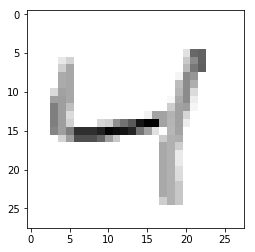

In [174]:
plt.imshow(x_train[2], cmap = plt.cm.binary)

In [180]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [183]:
# flatten each image before we can pass it into our neural network
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))
print(x_train.shape)
print(x_test.shape)

In [185]:
model = Sequential([

    
    Dense(64, input_shape = (784,), activation = tf.nn.relu),
    Dense(32, activation = tf.nn.relu),
    Dense(10, activation = tf.nn.softmax)
    ])
#model.build() # `input_shape` is the shape of the input data e.g. input_shape = (None, 32, 32, 3)
model.summary()

          


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_142 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_143 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_144 (Dense)            (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [186]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'] )


In [187]:
model.fit(x_train,y_train, epochs=3)


Epoch 1/3
60000/60000 [==============================] - 8s 128us/step - loss: 0.3403 - acc: 0.9016
Epoch 2/3
60000/60000 [==============================] - 6s 107us/step - loss: 0.1523 - acc: 0.9539
Epoch 3/3
60000/60000 [==============================] - 7s 110us/step - loss: 0.1076 - acc: 0.9671


In [195]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0476 - acc: 0.9851 - val_loss: 0.0934 - val_acc: 0.9715
Epoch 2/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.0414 - acc: 0.9871 - val_loss: 0.1081 - val_acc: 0.9689
Epoch 3/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.0348 - acc: 0.9888 - val_loss: 0.1039 - val_acc: 0.9701
Epoch 4/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0305 - acc: 0.9903 - val_loss: 0.1079 - val_acc: 0.9698
Epoch 5/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0254 - acc: 0.9918 - val_loss: 0.1067 - val_acc: 0.9686
Epoch 6/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0220 - acc: 0.9929 - val_loss: 0.1088 - val_acc: 0.9704
Epoch 7/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0187 - acc: 0.9939 - val_loss: 0.1155 - 

In [193]:
# Predict on the first 5 test images.
predictions = model.predict(x_test[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(y_test[:5]) # [7, 2, 1, 0, 4]

[7 2 1 0 4]
[7 2 1 0 4]


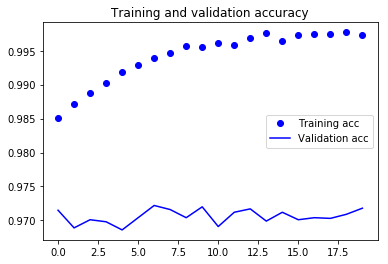

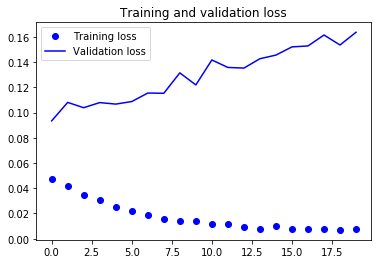

In [196]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()